In [404]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as snb
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [405]:
data = pd.read_csv("Customertravel.csv")

In [406]:
data

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
...,...,...,...,...,...,...,...
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0


In [407]:
income = data.groupby("AnnualIncomeClass")

In [408]:
income.count()

,Age,FrequentFlyer,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
AnnualIncomeClass,,,,,,
High Income,159,159,159,159,159,159
Low Income,386,386,386,386,386,386
Middle Income,409,409,409,409,409,409


In [409]:
income.ngroup()

0      2
1      1
2      2
3      2
4      1
      ..
949    1
950    2
951    2
952    1
953    0
Length: 954, dtype: int64

In [410]:
data.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

In [411]:
data.value_counts().sort_values()

Age  FrequentFlyer  AnnualIncomeClass  ServicesOpted  AccountSyncedToSocialMedia  BookedHotelOrNot  Target
28   No             Low Income         4              Yes                         No                1          1
27   No Record      Middle Income      2              No                          No                1          1
37   No             Middle Income      3              Yes                         Yes               0          1
27   No Record      Middle Income      2              No                          Yes               1          1
                                       4              No                          No                1          1
                                                                                                              ..
30   No             Middle Income      1              Yes                         Yes               0          9
                    Low Income         2              No                          No                0 

In [412]:
data["Age"].sort_values()

298    27
779    27
457    27
629    27
153    27
       ..
399    38
522    38
598    38
241    38
368    38
Name: Age, Length: 954, dtype: int64

In [413]:
age = data.groupby("Age").size()

In [414]:
age

Age
27     62
28     71
29     70
30    236
31    103
33     29
34    107
35     52
36     67
37    126
38     31
dtype: int64

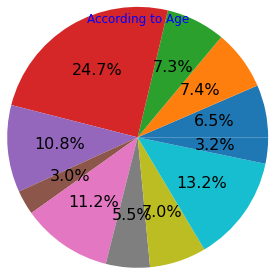

In [582]:
plt.pie(age.values , labels = None, autopct='%1.1f%%', radius = 1.5, textprops = {"fontsize" : 16}) 
plt.title("According to Age", c="b")
plt.show()

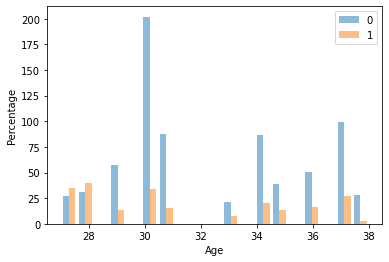

In [416]:
plt.hist([data[data.Target==0].Age, data[data.Target==1].Age], bins = 19, alpha =0.5,  align='mid',histtype = "bar", orientation='vertical',  label = ["0","1"])
plt.xlabel("Age")
plt.ylabel("Percentage")
plt.legend()
plt.show()

In [417]:
target = data.groupby("Target").size()

In [418]:
target

Target
0    730
1    224
dtype: int64

In [419]:
income = income.size()

In [420]:
income

AnnualIncomeClass
High Income      159
Low Income       386
Middle Income    409
dtype: int64

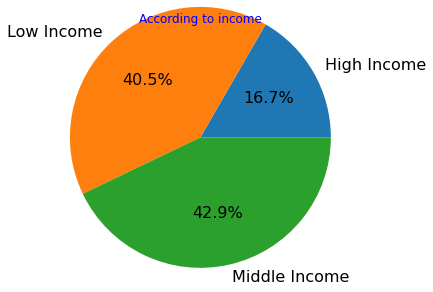

In [573]:
plt.pie(income.values , labels = ("High Income", "Low Income", "Middle Income" ), autopct='%1.1f%%', radius = 1.5, textprops = {"fontsize" : 16}) 
plt.title("According to income", c="b")
plt.show()

In [422]:
data_age = data.groupby(["Age", "Target"]).size(). head(60)

In [423]:
data_age

Age  Target
27   0          27
     1          35
28   0          31
     1          40
29   0          57
     1          13
30   0         202
     1          34
31   0          88
     1          15
33   0          21
     1           8
34   0          87
     1          20
35   0          39
     1          13
36   0          51
     1          16
37   0          99
     1          27
38   0          28
     1           3
dtype: int64

In [424]:
data.corr()

,Age,ServicesOpted,Target
Age,1.000000,-0.012422,-0.131534
ServicesOpted,-0.012422,1.000000,0.038646
Target,-0.131534,0.038646,1.000000


In [425]:
data.describe()

,Age,ServicesOpted,Target
count,954.000000,954.000000,954.000000
mean,32.109015,2.437107,0.234801
std,3.337388,1.606233,0.424097
min,27.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000
50%,31.000000,2.000000,0.000000
75%,35.000000,4.000000,0.000000
max,38.000000,6.000000,1.000000


In [426]:
data

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
...,...,...,...,...,...,...,...
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0


In [427]:
data1 = data.drop(["AnnualIncomeClass"], axis = 1)

In [428]:
data1

,Age,FrequentFlyer,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,6,No,Yes,0
1,34,Yes,5,Yes,No,1
2,37,No,3,Yes,No,0
3,30,No,2,No,No,0
4,30,No,1,No,No,0
...,...,...,...,...,...,...
949,31,Yes,1,No,No,0
950,30,No,5,No,Yes,0
951,37,No,4,No,No,0
952,30,No,1,Yes,Yes,0


In [429]:
data

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
...,...,...,...,...,...,...,...
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0


In [430]:
annuall = data.iloc[:,2:3].values

In [431]:
annuall

array([['Middle Income'],
       ['Low Income'],
       ['Middle Income'],
       ['Middle Income'],
       ['Low Income'],
       ['High Income'],
       ['Middle Income'],
       ['Low Income'],
       ['Low Income'],
       ['High Income'],
       ['Low Income'],
       ['Middle Income'],
       ['Middle Income'],
       ['Low Income'],
       ['Middle Income'],
       ['Low Income'],
       ['Low Income'],
       ['High Income'],
       ['Middle Income'],
       ['Low Income'],
       ['Middle Income'],
       ['High Income'],
       ['Low Income'],
       ['Middle Income'],
       ['Middle Income'],
       ['Low Income'],
       ['Middle Income'],
       ['Middle Income'],
       ['Low Income'],
       ['High Income'],
       ['Middle Income'],
       ['Low Income'],
       ['Middle Income'],
       ['High Income'],
       ['Low Income'],
       ['Middle Income'],
       ['Low Income'],
       ['Low Income'],
       ['Middle Income'],
       ['Middle Income'],
       ['Low Income'

In [432]:
le = preprocessing.LabelEncoder()
annuall[:,0] = le.fit_transform(annuall[:,0])

In [433]:
annuall

array([[2],
       [1],
       [2],
       [2],
       [1],
       [0],
       [2],
       [1],
       [1],
       [0],
       [1],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1],
       [0],
       [2],
       [1],
       [2],
       [0],
       [1],
       [2],
       [2],
       [1],
       [2],
       [2],
       [1],
       [0],
       [2],
       [1],
       [2],
       [0],
       [1],
       [2],
       [1],
       [1],
       [2],
       [2],
       [1],
       [0],
       [2],
       [1],
       [2],
       [0],
       [1],
       [2],
       [2],
       [1],
       [1],
       [2],
       [1],
       [0],
       [2],
       [1],
       [2],
       [0],
       [1],
       [2],
       [2],
       [1],
       [2],
       [2],
       [1],
       [0],
       [2],
       [1],
       [2],
       [0],
       [1],
       [1],
       [2],
       [1],
       [2],
       [2],
       [1],
       [0],
       [1],
       [1],
       [2],
       [0],
       [1],
    

In [434]:
ohe = preprocessing.OneHotEncoder()
annuall =ohe.fit_transform(annuall).toarray()


In [435]:
annuall

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [436]:
data2 = pd.DataFrame(data = annuall, index = range(954), columns = ["High Income", "Low Income", "Middle Income"])

In [437]:
data2.head(29)

,High Income,Low Income,Middle Income
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
5,1.0,0.0,0.0
6,0.0,0.0,1.0
7,0.0,1.0,0.0
8,0.0,1.0,0.0
9,1.0,0.0,0.0


In [438]:
data3 = pd.concat([data2, data], axis = 1)

In [439]:
data = data3.drop(["AnnualIncomeClass"],  axis = 1)

In [440]:
data

,High Income,Low Income,Middle Income,Age,FrequentFlyer,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,0.0,0.0,1.0,34,No,6,No,Yes,0
1,0.0,1.0,0.0,34,Yes,5,Yes,No,1
2,0.0,0.0,1.0,37,No,3,Yes,No,0
3,0.0,0.0,1.0,30,No,2,No,No,0
4,0.0,1.0,0.0,30,No,1,No,No,0
...,...,...,...,...,...,...,...,...,...
949,0.0,1.0,0.0,31,Yes,1,No,No,0
950,0.0,0.0,1.0,30,No,5,No,Yes,0
951,0.0,0.0,1.0,37,No,4,No,No,0
952,0.0,1.0,0.0,30,No,1,Yes,Yes,0


In [441]:
K = data.values

In [442]:
K

array([[0.0, 0.0, 1.0, ..., 'No', 'Yes', 0],
       [0.0, 1.0, 0.0, ..., 'Yes', 'No', 1],
       [0.0, 0.0, 1.0, ..., 'Yes', 'No', 0],
       ...,
       [0.0, 0.0, 1.0, ..., 'No', 'No', 0],
       [0.0, 1.0, 0.0, ..., 'Yes', 'Yes', 0],
       [1.0, 0.0, 0.0, ..., 'No', 'No', 0]], dtype=object)

In [443]:
le2 = preprocessing.LabelEncoder()
K[:,4] = le2.fit_transform(K[:,4])

In [444]:
K

array([[0.0, 0.0, 1.0, ..., 'No', 'Yes', 0],
       [0.0, 1.0, 0.0, ..., 'Yes', 'No', 1],
       [0.0, 0.0, 1.0, ..., 'Yes', 'No', 0],
       ...,
       [0.0, 0.0, 1.0, ..., 'No', 'No', 0],
       [0.0, 1.0, 0.0, ..., 'Yes', 'Yes', 0],
       [1.0, 0.0, 0.0, ..., 'No', 'No', 0]], dtype=object)

In [445]:
le3 = preprocessing.LabelEncoder()
K[:,6] = le3.fit_transform(K[:,6])

In [446]:
le4 = preprocessing.LabelEncoder()
K[:,7] = le4.fit_transform(K[:,7])

In [447]:
K.shape

(954, 9)

In [448]:
myData = pd.DataFrame(data = K, index = range(954), columns = ['High Income', 'Low Income', 'Middle Income', 'Age', 'FrequentFlyer',
       'ServicesOpted', 'AccountSyncedToSocialMedia', 'BookedHotelOrNot',
       'Target'])

In [449]:
myData

,High Income,Low Income,Middle Income,Age,FrequentFlyer,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,0.0,0.0,1.0,34,0,6,0,1,0
1,0.0,1.0,0.0,34,2,5,1,0,1
2,0.0,0.0,1.0,37,0,3,1,0,0
3,0.0,0.0,1.0,30,0,2,0,0,0
4,0.0,1.0,0.0,30,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
949,0.0,1.0,0.0,31,2,1,0,0,0
950,0.0,0.0,1.0,30,0,5,0,1,0
951,0.0,0.0,1.0,37,0,4,0,0,0
952,0.0,1.0,0.0,30,0,1,1,1,0


In [450]:
x = myData.iloc[:,0:8].values

In [451]:
x.shape

(954, 8)

In [452]:
y = myData.iloc[:,-1].values

In [453]:
y.shape

(954,)

In [454]:
y=y.astype('int') 

In [455]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.35, random_state=0)


In [456]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [457]:
X_train.shape

(620, 8)

In [458]:
x_train.shape

(620, 8)

In [459]:
X_test.shape

(334, 8)

In [460]:
y_test.shape

(334,)

In [461]:
y_train.shape

(620,)

In [583]:
myList = []
class Logistic():
    def __init__(self,y_pred, cm, accuracy, report):
        self.y_pred = y_pred 
        self.cm = cm
        self.accuracy = accuracy
        self.report = report
        logr = LogisticRegression()
        logr.fit(X_train, y_train)
        y_pred = logr.predict(X_test)
        print(f' Logistic Regression : \n{y_pred}')
        print("------------------------------------")
        cm = confusion_matrix(y_test, y_pred)
        print(f'confusion_ matrix: \n{cm}') 
        print("------------------------------------")
        accuracy = accuracy_score(y_pred, y_test)
        print(f'accuracy score: {accuracy}')
        print("------------------------------------")
        myList.append(accuracy)
        report = classification_report(y_test, y_pred)
        print(f'classification_report: {report}')
Logistic = Logistic("y_pred","cm", "accuracy","report")   
print(Logistic)    

     

 Logistic Regression : 
[0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0]
------------------------------------
confusion_ matrix: 
[[245  17]
 [ 39  33]]
------------------------------------
accuracy score: 0.8323353293413174
------------------------------------
classification_report:               precision    recall  f1-score   support

           0       0.86      0

In [463]:
myList1 = []
class Svc():
    def __init__(self,y_pred1, cm1, accuracy1, report1, success1):
        self.y_pred1 = y_pred1
        self.cm1 = cm1
        self.accuracy1 = accuracy1
        self.report1 = report1
        self.success1 = success1
        svc = SVC(C = 1, kernel = "rbf", gamma = 1, random_state = 0)
        svc.fit(X_train, y_train)
        y_pred1 = svc.predict(X_test)
        print(f' SVC : \n{y_pred1}')
        print("------------------------------------")
        cm1 = confusion_matrix(y_test, y_pred1)
        print(f'confusion_ matrix: \n{cm1}') 
        print("------------------------------------")
        accuracy1 = accuracy_score(y_pred1, y_test)
        print(f'accuracy score: {accuracy1}')
        print("------------------------------------")
        myList1.append(accuracy1)
        report1 = classification_report(y_test, y_pred1)
        print(f'classification_report: {report1}')
        print("------------------------------------")
        success1 = cross_val_score(estimator = svc, X= X_train, y=y_train, cv=4)
        print(f'success: {success1}')
        p = [{'C': [1,2,3,4,5], 'kernel': ['linear']}, {'C': [1,2,3,4,5], 'kernel': ['rbf']}, {'gamma': [1,0.5,0.1,0.01, 0.001]}]
        gs = GridSearchCV(estimator = svc, param_grid = p, scoring="accuracy", cv = 10, n_jobs = -1)
        grid_search = gs.fit(X_train, y_train)
        bestresult = grid_search.best_score_
        bestparameters = grid_search.best_params_
        print(f'best result: {bestresult}')
        print(f'best parameters: {bestparameters}')
Svc = Svc("y_pred1","cm1", "accuracy1","report1","success1")
         

 SVC : 
[0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 1]
------------------------------------
confusion_ matrix: 
[[240  22]
 [ 25  47]]
------------------------------------
accuracy score: 0.8592814371257484
------------------------------------
classification_report:               precision    recall  f1-score   support

           0       0.91      0.92      0.91   

In [464]:
myList2 = []
class Knn():
    def __init__(self,y_pred2, cm2, accuracy2, report2,success2):
        self.y_pred2 = y_pred2
        self.cm2 = cm2
        self.accuracy2 = accuracy2
        self.report2 = report2
        self.success2 = success2
        knn = KNeighborsClassifier(n_neighbors=5, metric = "manhattan", weights = "distance")
        knn.fit(X_train, y_train)
        y_pred2 = knn.predict(X_test)
        print(f' KNN : \n{y_pred2}')
        print("------------------------------------")
        cm2 = confusion_matrix(y_test, y_pred2)
        print(f'confusion_ matrix: \n{cm2}') 
        print("------------------------------------")
        accuracy2 = accuracy_score(y_pred2, y_test)
        print(f'accuracy score: {accuracy2}')
        print("------------------------------------")
        myList2.append(accuracy2)
        report2 = classification_report(y_test, y_pred2)
        print(f'classification_report: {report2}')
        print("------------------------------------")
        success2 = cross_val_score(estimator = knn, X= X_train, y=y_train, cv=4)
        print(f'success : {success2}')
        p1 = [{"n_neighbors": [3,5,11,19], "weights": ['uniform' ,'distance'], "metric": ('minkowski', 'euclidean', 'manhattan')} ]
        gs = GridSearchCV(estimator = knn, param_grid = p1, scoring="accuracy", cv = 10, n_jobs = -1)
        grid_search = gs.fit(X_train, y_train)
        bestresult = grid_search.best_score_
        bestparameters = grid_search.best_params_
        print(f'best result: {bestresult}')
        print(f'best parameters: {bestparameters}')
Knn("y_pred2","cm2", "accuracy2","report2", "success2")
         

 KNN : 
[0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1]
------------------------------------
confusion_ matrix: 
[[242  20]
 [ 23  49]]
------------------------------------
accuracy score: 0.8712574850299402
------------------------------------
classification_report:               precision    recall  f1-score   support

           0       0.91      0.92      0.92   

In [465]:
myList3 = []
class Decisiontree():
    def __init__(self,y_pred3, cm3, accuracy3, report3):
        self.y_pred3 = y_pred3
        self.cm3 = cm3
        self.accuracy3 = accuracy3
        self.report3 = report3
        dt = DecisionTreeClassifier(criterion = 'entropy')
        dt.fit(X_train, y_train)
        y_pred3 = dt.predict(X_test)
        print(f' Decision Tree : \n{y_pred3}')
        print("------------------------------------")
        cm = confusion_matrix(y_test, y_pred3)
        print(f'confusion_ matrix: \n{cm}') 
        print("------------------------------------")
        accuracy3 = accuracy_score(y_pred3, y_test)
        print(f'accuracy score: {accuracy3}')
        print("------------------------------------")
        myList3.append(accuracy3)
        report3 = classification_report(y_test, y_pred3)
        print(f'classification_report: {report3}')
        
Decisiontree("y_pred3", "cm3", "accuracy3", "report3")
         

 Decision Tree : 
[0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 1]
------------------------------------
confusion_ matrix: 
[[245  17]
 [ 16  56]]
------------------------------------
accuracy score: 0.9011976047904192
------------------------------------
classification_report:               precision    recall  f1-score   support

           0       0.94      0.94   

In [466]:
myList4 = []
class Randomforest():
    def __init__(self,y_pred4, cm4, accuracy4, report4,success4):
        self.y_pred4 = y_pred4
        self.cm4= cm4
        self.accuracy4= accuracy4
        self.report4= report4
        self.success4 = success4
        rfc = RandomForestClassifier(n_estimators=11, criterion = 'entropy', random_state = 0)
        rfc.fit(X_train, y_train)
        y_pred4 = rfc.predict(X_test)
        print(f'Random Forest : \n{y_pred4}')
        print("------------------------------------")
        cm4 = confusion_matrix(y_test, y_pred4)
        print(f'confusion_ matrix: \n{cm4}') 
        print("------------------------------------")
        accuracy4 = accuracy_score(y_pred4, y_test)
        print(f'accuracy score: {accuracy4}')
        print("------------------------------------")
        myList4.append(accuracy4)
        report4 = classification_report(y_test, y_pred4)
        print(f'classification_report: {report4}')
        print("------------------------------------")
        success4 = cross_val_score(estimator = rfc, X= X_train, y=y_train, cv=4)
        print(f'success : {success4}')
        p2 = {'n_estimators': [1,2,3,4,5,6,7,8,9,10,11,12], 'criterion' :['gini', 'entropy']}
        gs = GridSearchCV(estimator=rfc, param_grid=p2, scoring = "accuracy", cv= 10, n_jobs = -1)
        grid_search = gs.fit(X_train, y_train)
        bestresult = grid_search.best_score_
        bestparameters = grid_search.best_params_
        print(f'best result: {bestresult}')
        print(f'best parameters: {bestparameters}')

Randomforest("y_pred4","cm4", "accuracy4", "report4","success4")
         
    

Random Forest : 
[0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1]
------------------------------------
confusion_ matrix: 
[[243  19]
 [ 21  51]]
------------------------------------
accuracy score: 0.8802395209580839
------------------------------------
classification_report:               precision    recall  f1-score   support

           0       0.92      0.93    

In [467]:
myList5 = []
class Naivebayes():
    def __init__(self,y_pred5, cm5, accuracy5, report5):
        self.y_pred5 = y_pred5
        self.cm5= cm5
        self.accuracy5= accuracy5
        self.report5= report5
        gnb = GaussianNB(var_smoothing = 1.0)
        gnb.fit(X_train, y_train)
        y_pred5 = gnb.predict(X_test)
        print(f'Gaussian NB : \n{y_pred5}')
        print("------------------------------------")
        cm5 = confusion_matrix(y_test, y_pred5)
        print(f'confusion_ matrix: \n{cm5}') 
        print("------------------------------------")
        accuracy5 = accuracy_score(y_pred5, y_test)
        print(f'accuracy score: {accuracy5}')
        print("------------------------------------")
        myList5.append(accuracy5)
        report5 = classification_report(y_test, y_pred5)
        print(f'classification_report: {report5}')
        print("---------------------------------")
        success5 = cross_val_score(estimator = gnb, X= X_train, y=y_train, cv=4)
        print(f'success : {success5}')
        p4 = {'var_smoothing': np.logspace(0,9, num=100)}
        gs = GridSearchCV(estimator=gnb, 
                 param_grid=p4, 
                 cv=10,  
                 verbose=1, 
                 scoring='accuracy')
        grid_search = gs.fit(X_train, y_train)
        bestresult = grid_search.best_score_
        bestparameters = grid_search.best_params_
        print(f'best result: {bestresult}')
        print(f'best parameters: {bestparameters}')
Naivebayes("y_pred5","cm5", "accuracy5", "report5")
         

Gaussian NB : 
[0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 0]
------------------------------------
confusion_ matrix: 
[[240  22]
 [ 47  25]]
------------------------------------
accuracy score: 0.7934131736526946
------------------------------------
classification_report:               precision    recall  f1-score   support

           0       0.84      0.92      

In [567]:
models = myList + myList1 + myList2 + myList3 + myList4 + myList5
accuracy_scores = []
for model in models:
    accuracy_scores.append(model)
print(accuracy_scores)    

[0.8323353293413174, 0.8592814371257484, 0.8712574850299402, 0.9011976047904192, 0.8802395209580839, 0.7934131736526946]


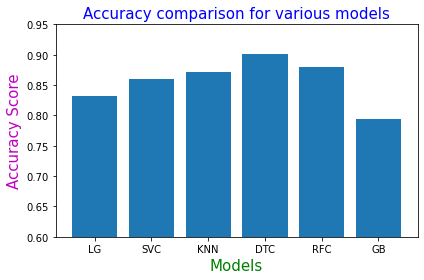

In [572]:
plt.bar(['LG', 'SVC', 'KNN', 'DTC', 'RFC', 'GB'], accuracy_scores)
plt.ylim(0.6,0.95)
plt.title('Accuracy comparison for various models', fontsize=15, color='b')
plt.xlabel('Models', fontsize=15, color='g')
plt.ylabel('Accuracy Score', fontsize=15, color='m')
plt.tight_layout()
plt.show()